In [1]:
# Imports packages
import os
import sys #reimport sys so we have it when not running package installation/setup
import infofile # local file containing cross-sections, sums of weights, dataset IDs
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt # for plotting
import matplotlib_inline # to edit the inline plot format

#suspicious this is necessary, never had to do it before!
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg') # to make plots in pdf (vector) format

from matplotlib.ticker import AutoMinorLocator # for minor ticks
import uproot # for reading .root files
import awkward as ak # to represent nested data in columnar format
import vector # for 4-momentum calculations
import time
import pickle

In [2]:
# Loads the path to the data
path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/"

# Creates a dictionary of all the data
samples = {
    'data': {
        'list' : ['data_A','data_B','data_C','data_D'], # data is from 2016, first four periods of data taking (ABCD)
    },
    'top':{ #processes with a top quark (single top, ttbar)
        'list' : ['ttbar_lep','single_top_tchan','single_antitop_tchan','single_top_wtchan','single_antitop_wtchan',
                  'single_top_schan','single_antitop_schan','ttW','ttee','ttmumu'],
        'color' : "#ffb255",
        'legend' : r'Top processes',
    },  
}

In [3]:
single_top = "single_top_tchan"

In [4]:
# Calculates xsec_weight
info = infofile.infos[single_top] # open infofile

lumi = 10 #fb-1
xsec_weight = (lumi*1000*info["xsec"])/(info["red_eff"]*info["sumw"]) #*1000 to go from fb-1 to pb-1

## 70 cut data

In [ ]:
# Specifies the path to the 70 data
fpath = r"data\\70\\"
files = os.listdir(fpath)

# gather chunks in ordinary Python lists
b_jet_parts, jet_pt_parts, lep_pt_parts  = [], [], []
lep_eta_parts, jet_eta_parts, met_Et_parts = [], [], []
lep_phi_parts, jet_phi_parts, met_phi_parts = [], [], []
jet_E_parts,  lep_E_parts  = [], []
MtW_parts, HT_parts, m_lb_parts = [], [], []

for fname in files:
    with open(os.path.join(fpath, fname), "rb") as f:
        (x1, x2, x3, x4, x5, x6, x7, x8, x9,
         x10, x11, x12, x13, x14) = pickle.load(f)

    b_jet_parts.append(x1)
    jet_pt_parts.append(x2)
    lep_pt_parts.append(x3)
    lep_eta_parts.append(x4)
    jet_eta_parts.append(x5)
    met_Et_parts.append(x6)
    lep_phi_parts.append(x7)
    jet_phi_parts.append(x8)
    met_phi_parts.append(x9)
    jet_E_parts.append(x10)
    lep_E_parts.append(x11)
    MtW_parts.append(x12)
    HT_parts.append(x13)
    m_lb_parts.append(x14)

# ONE call per variable, at the outermost axis (axis=0)
b_jet_selection70 = ak.concatenate(b_jet_parts , axis=0)
jet_pt70          = ak.concatenate(jet_pt_parts, axis=0)
lep_pt70          = ak.concatenate(lep_pt_parts, axis=0)
lep_eta70         = ak.concatenate(lep_eta_parts, axis=0)
jet_eta70         = ak.concatenate(jet_eta_parts, axis=0)
met_Et70          = ak.concatenate(met_Et_parts, axis=0)
lep_phi70         = ak.concatenate(lep_phi_parts, axis=0)
jet_phi70         = ak.concatenate(jet_phi_parts, axis=0)
met_phi70         = ak.concatenate(met_phi_parts, axis=0)
jet_E70           = ak.concatenate(jet_E_parts , axis=0)
lep_E70           = ak.concatenate(lep_E_parts , axis=0)
MtW70             = ak.concatenate(MtW_parts   , axis=0)
HT70              = ak.concatenate(HT_parts    , axis=0)
m_lb70            = ak.concatenate(m_lb_parts  , axis=0)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 418., 743.,
        760., 693., 737., 651., 607., 560., 502., 465., 414., 363., 390.,
        364., 303., 288., 283., 234., 250., 211., 216., 186.]),
 array([  0.,  16.,  32.,  48.,  64.,  80.,  96., 112., 128., 144., 160.,
        176., 192., 208., 224., 240., 256., 272., 288., 304., 320., 336.,
        352., 368., 384., 400., 416., 432., 448., 464., 480., 496.]),
 <BarContainer object of 31 artists>)

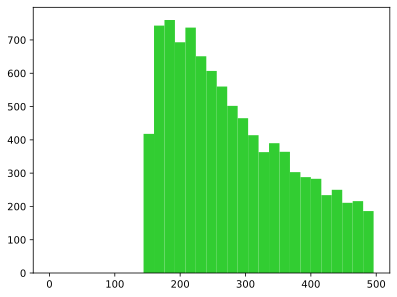

In [35]:
fig,ax = plt.subplots()
bins = np.arange(0,500,16)
ax.hist(m_lb70 / 1e3, bins=bins, color='limegreen')

## 77 cut data

In [47]:
# Specifies the path to the 77 data
fpath = r"data\\77\\"
files = os.listdir(fpath)
files

# # gather chunks in ordinary Python lists
# b_jet_parts, jet_pt_parts, lep_pt_parts  = [], [], []
# lep_eta_parts, jet_eta_parts, met_Et_parts = [], [], []
# lep_phi_parts, jet_phi_parts, met_phi_parts = [], [], []
# jet_E_parts,  lep_E_parts  = [], []
# MtW_parts, HT_parts, m_lb_parts = [], [], []
# total_weights = []

# for fname in files:
#     with open(os.path.join(fpath, fname), "rb") as f:
#         (x1, x2, x3, x4, x5, x6, x7, x8, x9,
#          x10, x11, x12, x13, x14, x15) = pickle.load(f)

#     b_jet_parts.append(x1)
#     jet_pt_parts.append(x2)
#     lep_pt_parts.append(x3)
#     lep_eta_parts.append(x4)
#     jet_eta_parts.append(x5)
#     met_Et_parts.append(x6)
#     lep_phi_parts.append(x7)
#     jet_phi_parts.append(x8)
#     met_phi_parts.append(x9)
#     jet_E_parts.append(x10)
#     lep_E_parts.append(x11)
#     MtW_parts.append(x12)
#     HT_parts.append(x13)
#     m_lb_parts.append(x14)
#     total_weights.append(x15)

# # ONE call per variable, at the outermost axis (axis=0)
# b_jet_selection77 = ak.concatenate(b_jet_parts , axis=0)
# jet_pt77          = ak.concatenate(jet_pt_parts, axis=0)
# lep_pt77          = ak.concatenate(lep_pt_parts, axis=0)
# lep_eta77         = ak.concatenate(lep_eta_parts, axis=0)
# jet_eta77         = ak.concatenate(jet_eta_parts, axis=0)
# met_Et77          = ak.concatenate(met_Et_parts, axis=0)
# lep_phi77         = ak.concatenate(lep_phi_parts, axis=0)
# jet_phi77         = ak.concatenate(jet_phi_parts, axis=0)
# met_phi77         = ak.concatenate(met_phi_parts, axis=0)
# jet_E77           = ak.concatenate(jet_E_parts , axis=0)
# lep_E77           = ak.concatenate(lep_E_parts , axis=0)
# MtW77             = ak.concatenate(MtW_parts   , axis=0)
# HT77              = ak.concatenate(HT_parts    , axis=0)
# m_lb77            = ak.concatenate(m_lb_parts  , axis=0)
# total_weights77   = ak.concatenate(total_weights, axis=0)

# # Applies the weights to the data
# total_weights77 = total_weights77 * xsec_weight # apply the weights to the data

[]

In [ ]:
fig,ax = plt.subplots()
bins = np.arange(0,500,16)
ax.hist(m_lb77 / 1e3, bins=bins, color='limegreen')

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         586., 1015., 1051.,  960., 1008.,  900.,  826.,  758.,  709.,
         635.,  597.,  524.,  555.,  507.,  447.,  394.,  413.,  368.,
         359.,  298.,  301.,  262.]),
 array([  0.,  16.,  32.,  48.,  64.,  80.,  96., 112., 128., 144., 160.,
        176., 192., 208., 224., 240., 256., 272., 288., 304., 320., 336.,
        352., 368., 384., 400., 416., 432., 448., 464., 480., 496.]),
 <BarContainer object of 31 artists>)

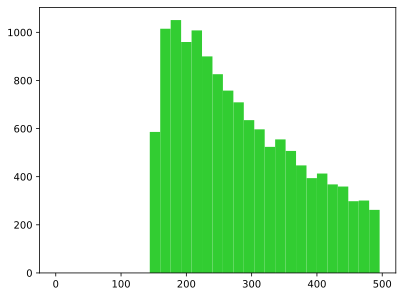

In [37]:
fig,ax = plt.subplots()
bins = np.arange(0,500,16)
ax.hist(m_lb77 / 1e3, bins=bins, color='limegreen')

## 85 cut data

In [5]:
## LOADS IN THE 85 DATA ##
# Specifies the path to the 85 data
fpath = r"data\\85\\"
files = os.listdir(fpath)
dat_files = ['datA85.pkl', 'datB85.pkl', 'datC85.pkl', 'datD85.pkl']

# gather chunks in ordinary Python lists
b_jet_parts, jet_pt_parts, lep_pt_parts  = [], [], []
lep_eta_parts, jet_eta_parts, met_Et_parts = [], [], []
lep_phi_parts, jet_phi_parts, met_phi_parts = [], [], []
jet_E_parts,  lep_E_parts  = [], []
MtW_parts, HT_parts, m_lb_parts = [], [], []
total_weights = []

for fname in dat_files:
    with open(os.path.join(fpath, fname), "rb") as f:
        (x1, x2, x3, x4, x5, x6, x7, x8, x9,
         x10, x11, x12, x13, x14) = pickle.load(f)

    b_jet_parts.append(x1)
    jet_pt_parts.append(x2)
    lep_pt_parts.append(x3)
    lep_eta_parts.append(x4)
    jet_eta_parts.append(x5)
    met_Et_parts.append(x6)
    lep_phi_parts.append(x7)
    jet_phi_parts.append(x8)
    met_phi_parts.append(x9)
    jet_E_parts.append(x10)
    lep_E_parts.append(x11)
    MtW_parts.append(x12)
    HT_parts.append(x13)
    m_lb_parts.append(x14)

# ONE call per variable, at the outermost axis (axis=0)
b_jet_selection77 = ak.concatenate(b_jet_parts , axis=0)
jet_pt85          = ak.concatenate(jet_pt_parts, axis=0)
lep_pt85          = ak.concatenate(lep_pt_parts, axis=0)
lep_eta85         = ak.concatenate(lep_eta_parts, axis=0)
jet_eta85         = ak.concatenate(jet_eta_parts, axis=0)
met_Et85          = ak.concatenate(met_Et_parts, axis=0)
lep_phi85         = ak.concatenate(lep_phi_parts, axis=0)
jet_phi85         = ak.concatenate(jet_phi_parts, axis=0)
met_phi85         = ak.concatenate(met_phi_parts, axis=0)
jet_E85           = ak.concatenate(jet_E_parts , axis=0)
lep_E85           = ak.concatenate(lep_E_parts , axis=0)
MtW85             = ak.concatenate(MtW_parts   , axis=0)
HT85              = ak.concatenate(HT_parts    , axis=0)
m_lb85            = ak.concatenate(m_lb_parts  , axis=0)

# Applies the weights to the data
# total_weights85 = total_weights85 * xsec_weight # apply the weights to the data

In [6]:
# Loads in the MC data
# Specifies the path to the 85 data
fpath = r"data\\85\\"
files = os.listdir(fpath)
dat_file = 'single_top_t85.pkl'

# gather chunks in ordinary Python lists
b_jet_parts, jet_pt_parts, lep_pt_parts  = [], [], []
lep_eta_parts, jet_eta_parts, met_Et_parts = [], [], []
lep_phi_parts, jet_phi_parts, met_phi_parts = [], [], []
jet_E_parts,  lep_E_parts  = [], []
MtW_parts, HT_parts, m_lb_parts = [], [], []
total_weights = []

with open(os.path.join(fpath, dat_file), "rb") as f:
    (x1, x2, x3, x4, x5, x6, x7, x8, x9,
        x10, x11, x12, x13, x14, x15) = pickle.load(f)

b_jet_parts.append(x1)
jet_pt_parts.append(x2)
lep_pt_parts.append(x3)
lep_eta_parts.append(x4)
jet_eta_parts.append(x5)
met_Et_parts.append(x6)
lep_phi_parts.append(x7)
jet_phi_parts.append(x8)
met_phi_parts.append(x9)
jet_E_parts.append(x10)
lep_E_parts.append(x11)
MtW_parts.append(x12)
HT_parts.append(x13)
m_lb_parts.append(x14)
total_weights.append(x15)

# ONE call per variable, at the outermost axis (axis=0)
b_jet_selectionMC85 = ak.concatenate(b_jet_parts , axis=0)
jet_ptMC85          = ak.concatenate(jet_pt_parts, axis=0)
lep_ptMC85          = ak.concatenate(lep_pt_parts, axis=0)
lep_etaMC85         = ak.concatenate(lep_eta_parts, axis=0)
jet_etaMC85         = ak.concatenate(jet_eta_parts, axis=0)
met_EtMC85          = ak.concatenate(met_Et_parts, axis=0)
lep_phiMC85         = ak.concatenate(lep_phi_parts, axis=0)
jet_phiMC85         = ak.concatenate(jet_phi_parts, axis=0)
met_phiMC85         = ak.concatenate(met_phi_parts, axis=0)
jet_EMC85           = ak.concatenate(jet_E_parts , axis=0)
lep_EMC85           = ak.concatenate(lep_E_parts , axis=0)
MtWMC85             = ak.concatenate(MtW_parts   , axis=0)
HTMC85              = ak.concatenate(HT_parts    , axis=0)
m_lbMC85            = ak.concatenate(m_lb_parts  , axis=0)
total_weights85   = ak.concatenate(total_weights, axis=0)

# Applies the weights to the data
total_weights85 = total_weights85 * xsec_weight # apply the weights to the data

In [7]:
# Loads in the MC data
# Specifies the path to the 85 data
fpath = r"data\\85\\"
files = os.listdir(fpath)
dat_file = 'single_antitop_t85.pkl'

# gather chunks in ordinary Python lists
b_jet_parts, jet_pt_parts, lep_pt_parts  = [], [], []
lep_eta_parts, jet_eta_parts, met_Et_parts = [], [], []
lep_phi_parts, jet_phi_parts, met_phi_parts = [], [], []
jet_E_parts,  lep_E_parts  = [], []
MtW_parts, HT_parts, m_lb_parts = [], [], []
total_weights = []

with open(os.path.join(fpath, dat_file), "rb") as f:
    (x1, x2, x3, x4, x5, x6, x7, x8, x9,
        x10, x11, x12, x13, x14, x15) = pickle.load(f)

b_jet_parts.append(x1)
jet_pt_parts.append(x2)
lep_pt_parts.append(x3)
lep_eta_parts.append(x4)
jet_eta_parts.append(x5)
met_Et_parts.append(x6)
lep_phi_parts.append(x7)
jet_phi_parts.append(x8)
met_phi_parts.append(x9)
jet_E_parts.append(x10)
lep_E_parts.append(x11)
MtW_parts.append(x12)
HT_parts.append(x13)
m_lb_parts.append(x14)
total_weights.append(x15)

# ONE call per variable, at the outermost axis (axis=0)
b_jet_selection_atMC85 = ak.concatenate(b_jet_parts , axis=0)
jet_pt_atMC85          = ak.concatenate(jet_pt_parts, axis=0)
lep_pt_atMC85          = ak.concatenate(lep_pt_parts, axis=0)
lep_eta_atMC85         = ak.concatenate(lep_eta_parts, axis=0)
jet_eta_atMC85         = ak.concatenate(jet_eta_parts, axis=0)
met_Et_atMC85          = ak.concatenate(met_Et_parts, axis=0)
lep_phi_atMC85         = ak.concatenate(lep_phi_parts, axis=0)
jet_phi_atMC85         = ak.concatenate(jet_phi_parts, axis=0)
met_phi_atMC85         = ak.concatenate(met_phi_parts, axis=0)
jet_E_atMC85           = ak.concatenate(jet_E_parts , axis=0)
lep_E_atMC85           = ak.concatenate(lep_E_parts , axis=0)
MtW_atMC85             = ak.concatenate(MtW_parts   , axis=0)
HT_atMC85              = ak.concatenate(HT_parts    , axis=0)
m_lb_atMC85            = ak.concatenate(m_lb_parts  , axis=0)
total_weightst85       = ak.concatenate(total_weights, axis=0)

# Applies the weights to the data
total_weightst85 = total_weightst85 * xsec_weight # apply the weights to the data

In [8]:
# Adds together the signals from the top and anti-top processes
total_weights = np.array(ak.concatenate([total_weights85, total_weightst85], axis=0))
m_lb_MC       = np.array(ak.flatten(ak.concatenate([m_lbMC85, m_lb_atMC85], axis=0)))

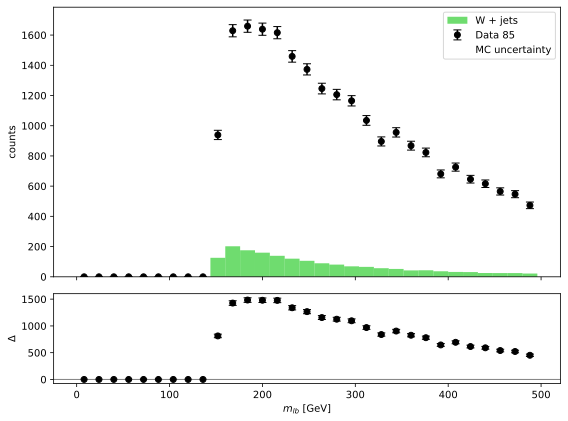

In [10]:
bins        = np.arange(0, 500, 16)
bin_centers = 0.5 * (bins[1:] + bins[:-1])          # centres for plotting

# ─── Monte‑Carlo histogram and errors ────────────────────────────────
mc_counts, _ = np.histogram(m_lb_MC / 1e3, weights = total_weights, bins=bins)
mc_errors    = np.sqrt(mc_counts)                   # Poisson errors

# ─── Data histogram and errors ──────────────────────────────────────
dat_counts, _ = np.histogram(m_lb85 / 1e3, bins=bins)
dat_errors    = np.sqrt(dat_counts)

# ─── Figure with two stacked axes ───────────────────────────────────
fig, (ax, ax_resid) = plt.subplots(
    nrows=2, sharex=True, figsize=(8, 6),
    gridspec_kw={"height_ratios": [3, 1]}
)

# ─── Main panel ─────────────────────────────────────────────────────
ax.errorbar(
    bin_centers, dat_counts, yerr=dat_errors,
    fmt="o", color="k", capsize=4, label="Data 85"
)
ax.hist(
    m_lb_MC / 1e3, bins=bins, color="limegreen",
    weights = total_weights, alpha=0.7, label="W + jets", stacked=True
)
ax.bar(                                          # hashed MC‑uncertainty band
    bin_centers, 2 * mc_errors,
    bottom = mc_counts - mc_errors,
    width=np.diff(bins)[0], hatch="////",
    color="none", alpha=0.5, label="MC uncertainty"
)

ax.set_ylabel("counts")
ax.legend()

# ─── Residuals panel ────────────────────────────────────────────────
residual     = dat_counts - mc_counts
resid_errors = np.sqrt(dat_errors**2 + mc_errors**2)  # combined uncertainty

ax_resid.errorbar(
    bin_centers, residual, yerr=resid_errors,
    fmt="o", color="k", capsize=4
)
ax_resid.axhline(0, color="gray", lw=1)
ax_resid.set_xlabel(r"$m_{lb}$ [GeV]")
ax_resid.set_ylabel(r"$\Delta$")

plt.tight_layout()
plt.show()